## Heart Disease Prediction using Machine Learning

We will be closely working with a heart disease dataset, and our sole aim is to build a model to detect the probability of person that a patient will have a heart problem or not.

Reference: https://www.analyticsvidhya.com/blog/2022/02/heart-disease-prediction-using-machine-learning/

In [1]:
# import necessary libraries to explore the data
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features, identify_missing_data



## Read and Explore the Data

In [2]:
# read the data

heart_disease_data = pd.read_csv('../data/heart_attack_data.csv')

# preview the data
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [3]:
# check the shape of the data

heart_disease_data.shape

# we have 294 rows of data, and 14 potential features.
# small data set

(294, 14)

In [4]:
# check the summary information of the data

heart_disease_data.info()

# do we have any categorical data that needs processing?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [5]:
# check how statistically the data is spread

heart_disease_data.describe()

# question: are there are features that have a low standard deviation i.e. < 0.1?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [6]:
# drop any features that have a low std

low_var_features = identify_low_variance_features(heart_disease_data, std_threshold=0.1)

heart_disease_data.drop(low_var_features, axis = 1, inplace = True)



number of low variance features: 1
low variance features: ['ca']


In [7]:
# check if dropped

list(heart_disease_data)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'target']

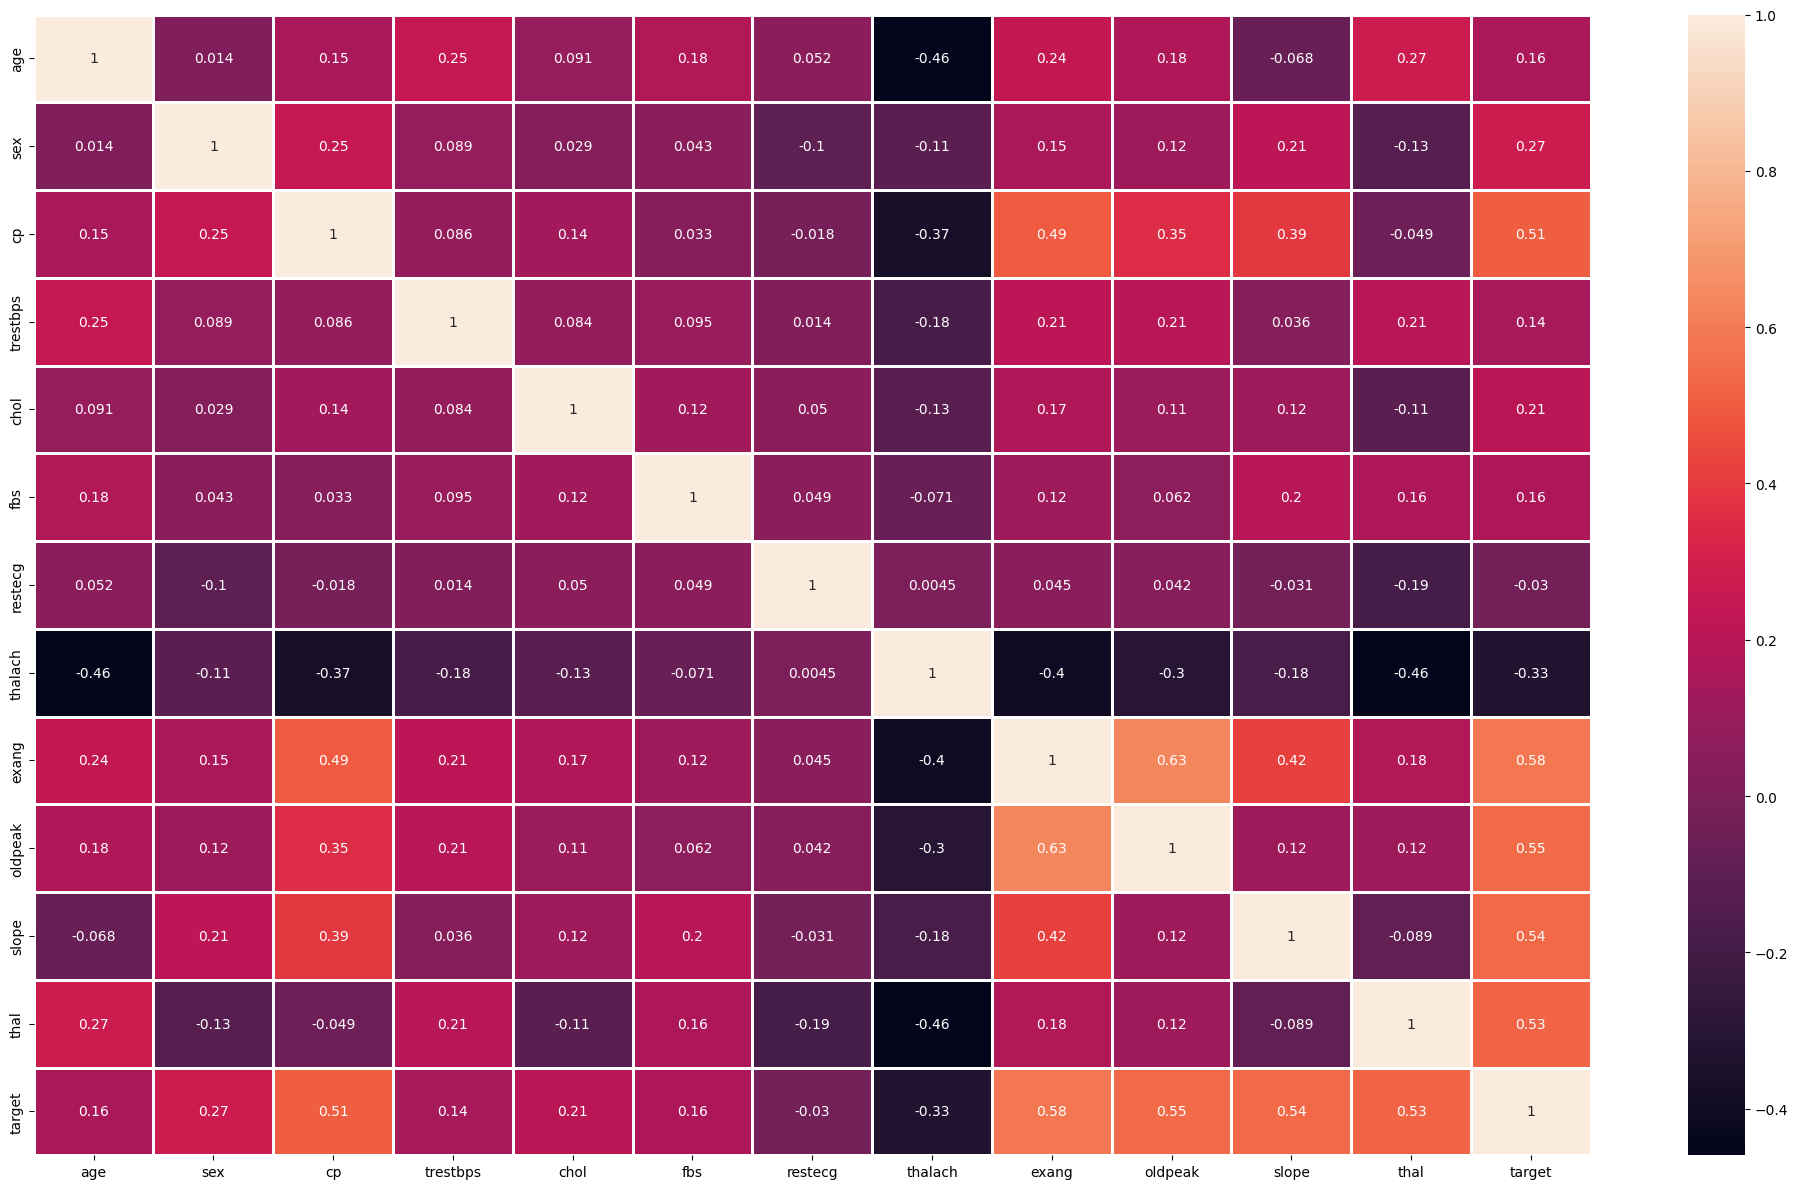

In [8]:
# check the correlation between features

plt.figure(figsize=(20,12))
sns.heatmap(heart_disease_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

# question: which features are highly correlated? 

In [9]:
# can also use this definition, as the plot can be difficult to read sometimes

identify_highly_correlated_features(heart_disease_data, correlation_threshold=0.9)

# drop any features that are highly correlated

""


In [10]:
# check the distribution of the target

heart_disease_data.target.value_counts(dropna = True, normalize = True)

# The data is slightly imbalanced, with roughly 36% of patients having had a heart disease

target
0    0.639456
1    0.360544
Name: proportion, dtype: float64

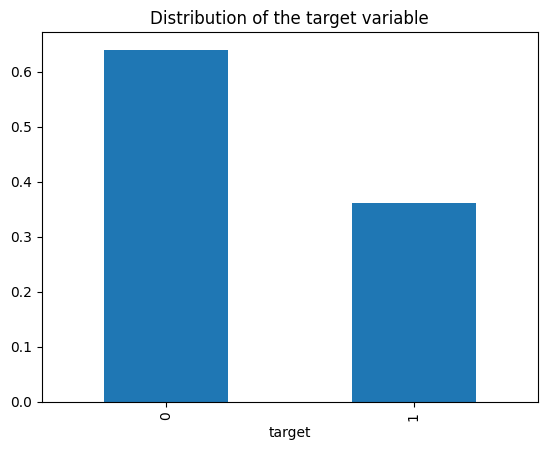

In [11]:
# visualise the distribution of the target

heart_disease_data.target.value_counts(normalize = True).plot(kind = 'bar')
plt.title("Distribution of the target variable");

# This is an example of an imbalanced dataset

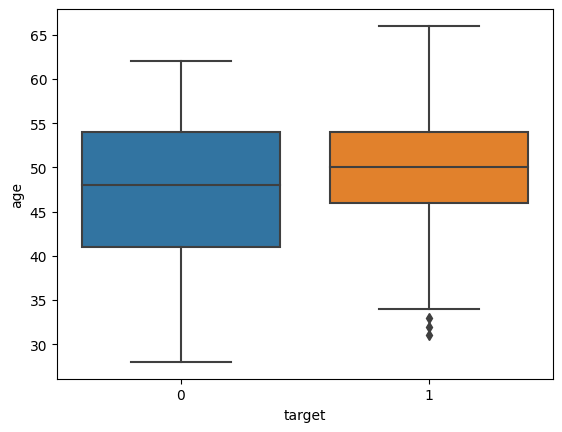

In [12]:
# Bonus - looking at patterns in the data

# I am interested in looking at patterns between age and the target.
# My assumption is that older people have had more heart attacks, even though this has a low correlation.

sns.boxplot(x=heart_disease_data.target, y=heart_disease_data.age);

# The boxplots show that patients with heart attacks have a higher age range, than patients that have not.
# Younger patients are considered outliers amongst patients with heart attacks. That's interesting!

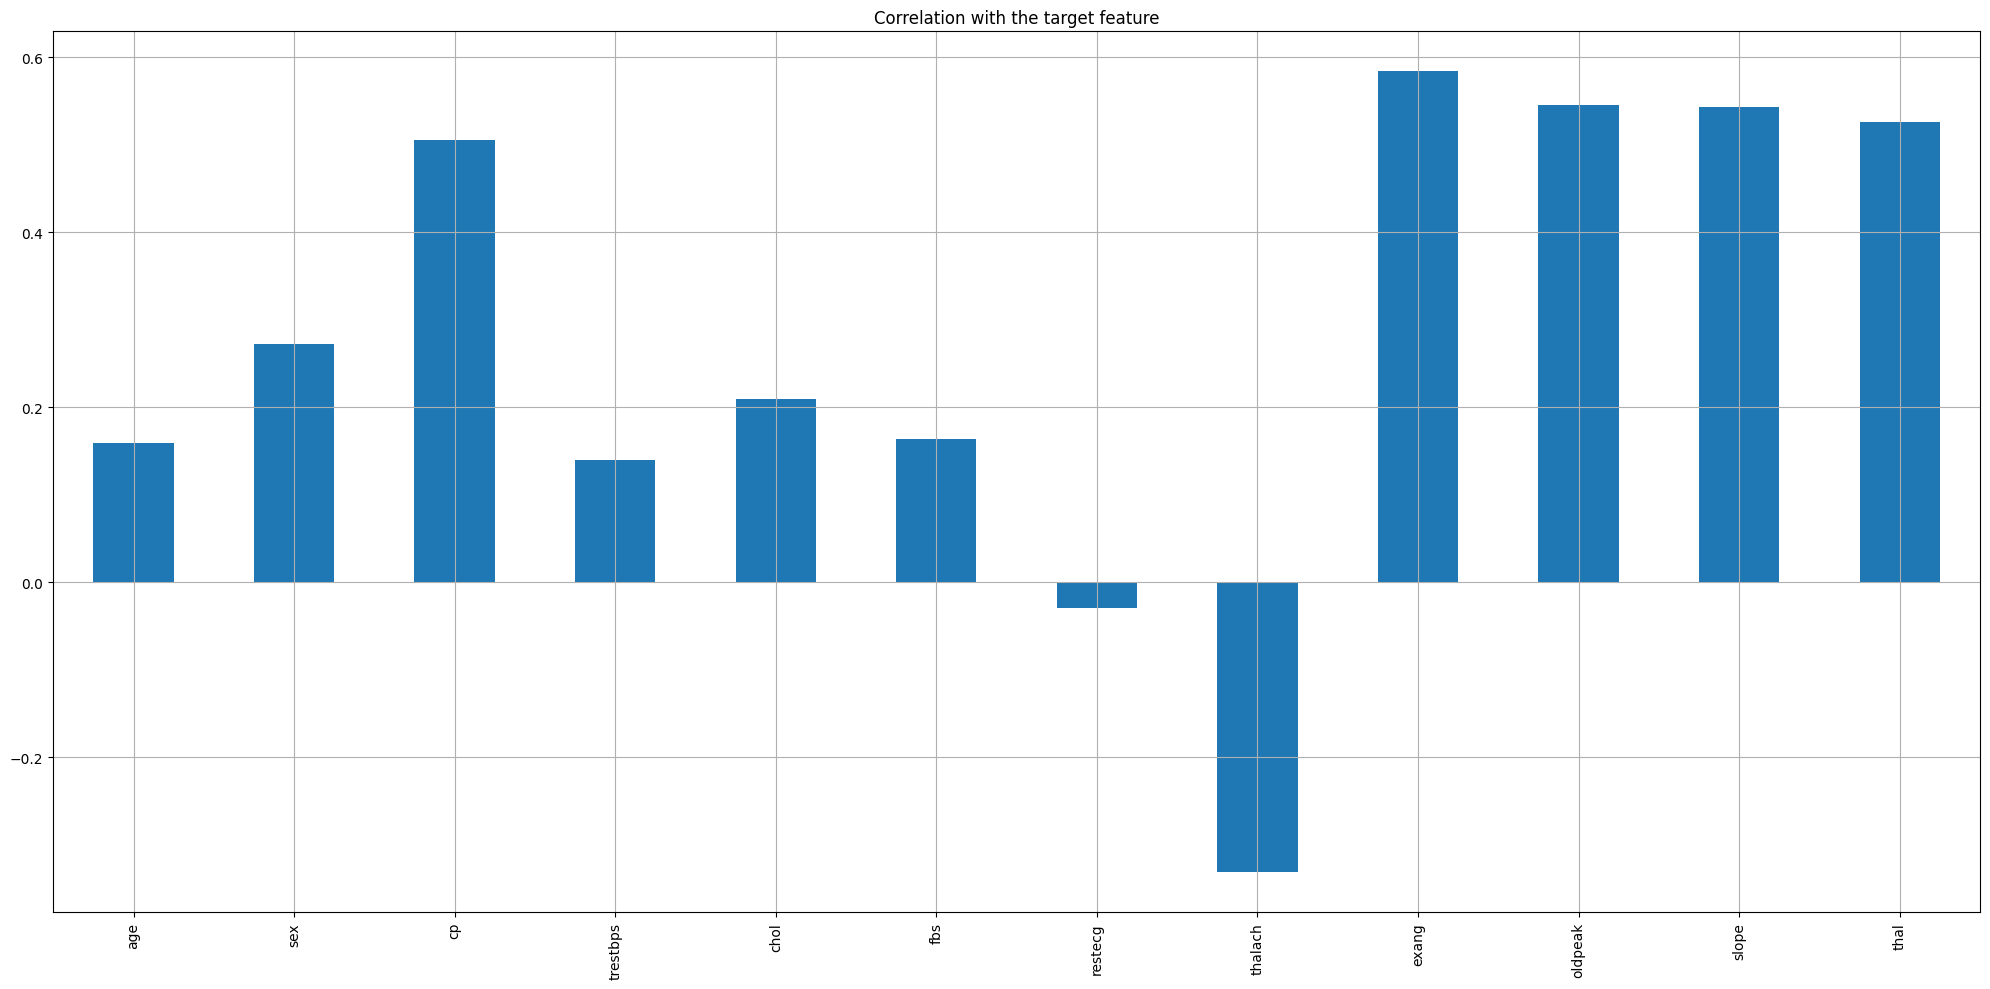

In [13]:
# Bonus

# identfiying features that are highly correlated with the target

heart_disease_data.drop('target', axis=1).corrwith(heart_disease_data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

# exang has the highest postive correlation, closely followed by oldpeak, slope and thal


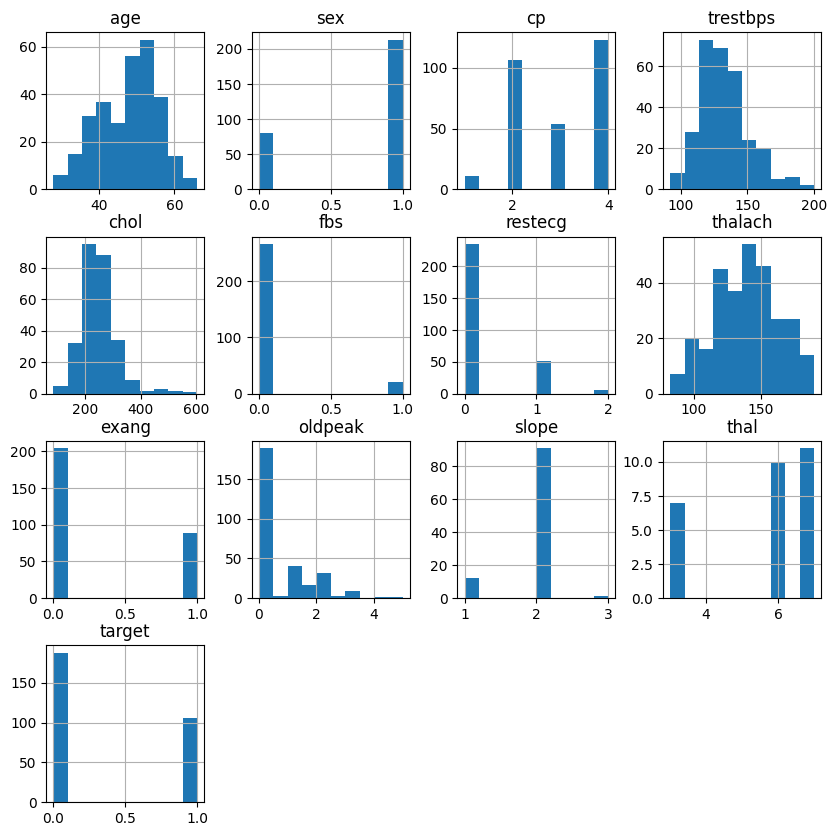

In [14]:
# Bonus visualise the distribution of the variables

heart_disease_data.hist(figsize=(10,10));

# some variables showing signs of normal distriution for e.g. thalach and possibly age, but most variables are skewed

In [15]:
# question: check how much missing data we have

missing_value_df = identify_missing_data(heart_disease_data)
missing_value_df


,feature,percent_missing,data_type
0,thal,90.48,float64
1,slope,64.63,float64
2,chol,7.82,float64
3,fbs,2.72,float64
4,trestbps,0.34,float64
5,restecg,0.34,float64
6,thalach,0.34,float64
7,exang,0.34,float64


In [16]:
print("# of features with missing data:", missing_value_df.shape[0])

# of features with missing data: 8


The goal of EDA is to understand the data and identify if we need to do any additional data cleaning or feature engineering.
- We have already dropped features with low standard deviation, so we do not have drop any additional features
- Since we have no highly correlated features (positive or negative), we do not have to drop any features
- All the features have a numerical data type, so we do not have to do any additonal encoding
- We have 8 features with missing data, so we have to handle this